**bold text**

**Titanic** is one of the most infamous shipwrecks in history. On April 15, 1912, during her maiden voyage, the **Titanic** sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

**What particularly we need do in this challenge ?**

In this challenge, we need to complete the analysis of what sorts of people were likely to survive. In particular, we apply the tools of machine learning to predict which passengers survived the tragedy?.

**Import libraries like Numpy, Padas, Matplotlib and Seaborn**

In [1]:
# numpy
import numpy as np

# pandas
import pandas as pd

# matplotlib 
import matplotlib.pyplot as plt

# seaborn 
import seaborn as sns

# import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

# import confusion_matrix
from sklearn.metrics import confusion_matrix

# import classification report
from sklearn.metrics import classification_report

# warning 
import warnings
warnings.filterwarnings('ignore')

**Import Dataset**

In [2]:
# import train data 
train = pd.read_csv("/content/drive/MyDrive/Kaggle Competitions/Titanic-ML from Disaster /train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Exploratory Data Analysis**

In [3]:
# Display of df dataset shape
train.shape

(891, 12)

In [4]:
# Display dataset Columns 
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
# Display of 1st 5 rows of data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# Display of last 5 rows of data
train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
# Display ramdomly and number of records of data
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
183,184,1,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,F4,S
800,801,0,2,"Ponesell, Mr. Martin",male,34.0,0,0,250647,13.0000,NaN,S
358,359,1,3,"McGovern, Miss. Mary",female,NaN,0,0,330931,7.8792,NaN,Q
288,289,1,2,"Hosono, Mr. Masabumi",male,42.0,0,0,237798,13.0000,NaN,S
850,851,0,3,"Andersson, Master. Sigvard Harald Elias",male,4.0,4,2,347082,31.2750,NaN,S


In [8]:
# List the type of all columns 
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
# Finding out if the dataset contains any null values 
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Sumary of the dataset**

- The described method will help to see how data has been spread of numerical values. We can clearly see the minimum value,mean,values,different percentile values, and maximum values.

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Data Cleaning**

In [11]:
# Chack the shape beford drop the duplicates values
train.shape

(891, 12)

In [12]:
# count duplicates values
train.duplicated().sum()

0

In [13]:
#if there are duplicates values, this code duplicate values drop...

train= train.drop_duplicates()

In [14]:
# Chack the shape after the duplicates values
train.shape

(891, 12)

Before drop and after drop the duplicates the data set has same shape and sum count is (0) zero. which meanse no duplicates values in the dataset.

In [15]:
# Count of null values 
# chack the missing values in any columns 
# Display number of null values in every columns in dataset

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Null values have 'Age' and 'Embarked' dataset columns

**Repalce no.of zero values with mean of that columns**

In [16]:
train['Age'].fillna(29, inplace=True)
train['Embarked'].fillna('Queenstown', inplace=True)

In [17]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.560236,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.005010,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033632,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.067814,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.334974,0.083081,0.018443,-0.549500
Age,0.033632,-0.067814,-0.334974,1.000000,-0.232978,-0.176486,0.093706
SibSp,-0.057527,-0.035322,0.083081,-0.232978,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.176486,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.093706,0.159651,0.216225,1.000000


In [19]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# **Data Visulization**

**Count Plot**

Survive Total Values : 891
Not Survive (0) 549
Survive (1) 342


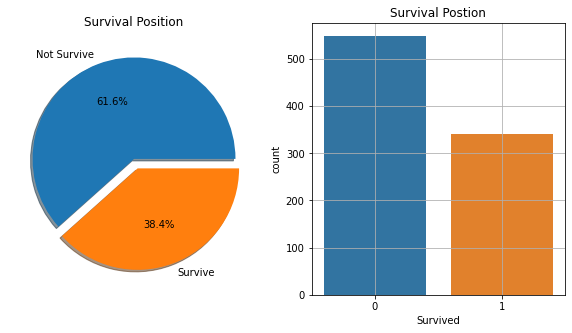

In [20]:
# Survivel count Plot

f,ax = plt.subplots(1,2,figsize=(10,5))
mylabels = ['Not Survive','Survive']
train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],labels=mylabels ,shadow=True)
ax[0].set_title('Survival Position')
ax[0].set_ylabel('')

sns.countplot('Survived',data=train,ax=ax[1])
ax[1].set_title('Survival Postion')

S,NS = train['Survived'].value_counts()
print('Survive Total Values :', train['Survived'].value_counts().sum())
print('Not Survive (0)',S)
print('Survive (1)',NS)
plt.grid()
plt.show()

- Out of total people, 342 are Survived(1) and 549 are did not survived (0).
- In the Survived columns, 1 represent PassengerId survived and 0 represent PassengerId did no survived.
- The count plot tells us that database is imbalanced, as number 

**Histogram**


*   Histograms are one of the most common graphs used to display numeric data.
*   Distribution of the data - Whether the data is normally distributed or if it's skewed.

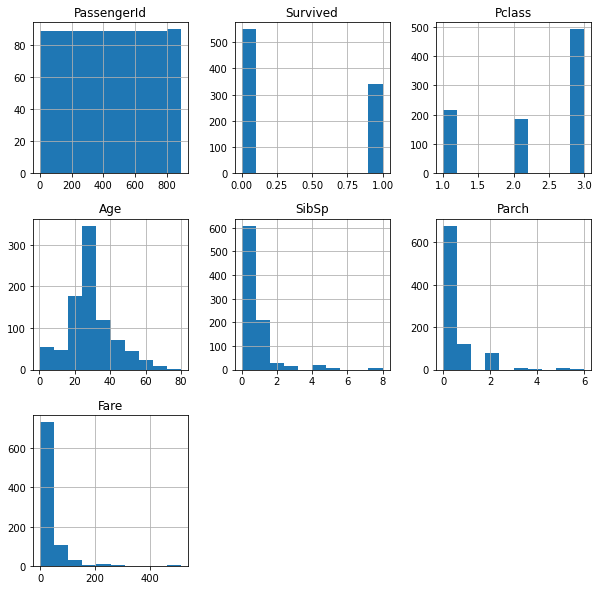

In [21]:
# Histogram of each feature 

train.hist(figsize=(10,10))
plt.show()

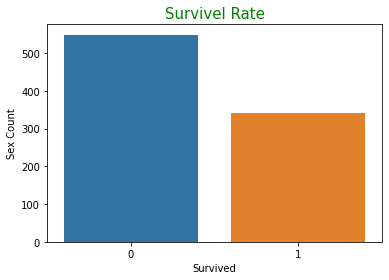

In [22]:
# Servived...
sns.countplot('Survived',data=train)
train['Sex'].value_counts()
plt.title('Survivel Rate',color='Green',size=15)
plt.xlabel('Survived')
plt.ylabel('Sex Count')
plt.show()

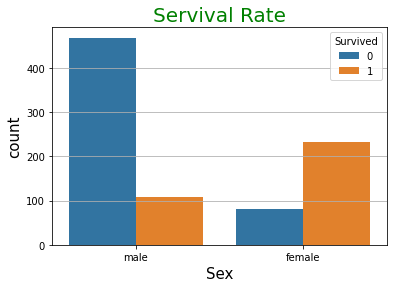

In [23]:
plt.title('Servival Rate',color='green',size=20)
sns.countplot('Sex',data=train,hue='Survived')
plt.xlabel('Sex',size=15)
plt.ylabel('count',size=15)
plt.grid(axis='y')

In [24]:
for(Pclass,Survived), sub_df in train.groupby(['Pclass','Survived']):
  print('Pclass: {0}, Survived:{1}'.format(Pclass,Survived))
  print(sub_df['Sex'].value_counts())

Pclass: 1, Survived:0
male      77
female     3
Name: Sex, dtype: int64
Pclass: 1, Survived:1
female    91
male      45
Name: Sex, dtype: int64
Pclass: 2, Survived:0
male      91
female     6
Name: Sex, dtype: int64
Pclass: 2, Survived:1
female    70
male      17
Name: Sex, dtype: int64
Pclass: 3, Survived:0
male      300
female     72
Name: Sex, dtype: int64
Pclass: 3, Survived:1
female    72
male      47
Name: Sex, dtype: int64


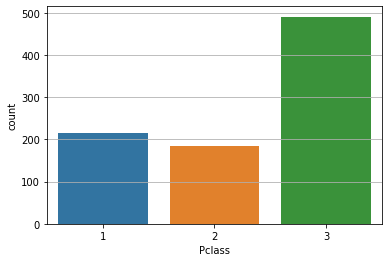

In [25]:
sns.countplot('Pclass',data=train)
plt.grid(axis='y')
plt.show()

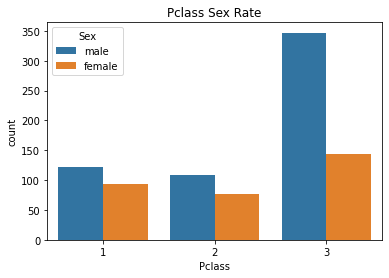

In [26]:
sns.countplot('Pclass', data = train, hue='Sex')
plt.title('Pclass Sex Rate')
plt.show()

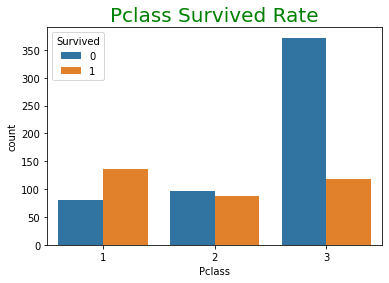

In [27]:
sns.countplot('Pclass',data=train, hue='Survived')
plt.title('Pclass Survived Rate',color='green',size=20)
plt.show()

findfont: Font family ['sefif'] not found. Falling back to DejaVu Sans.


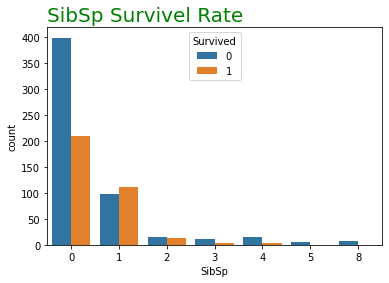

In [28]:
# Who Servived Most
font1 = {'family':'sefif','color':'green','size':20}

sns.countplot('SibSp',data=train,hue='Survived')
plt.title('SibSp Survivel Rate',loc='left',fontdict=font1)

plt.show()

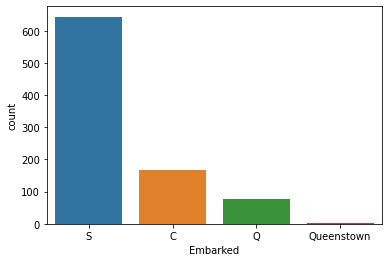

In [29]:
sns.countplot('Embarked', data=train)
plt.show()

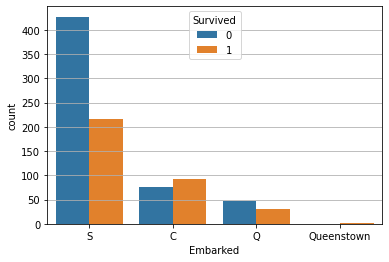

In [30]:
sns.countplot('Embarked', data=train, hue='Survived')
plt.grid(axis='y')
plt.show()

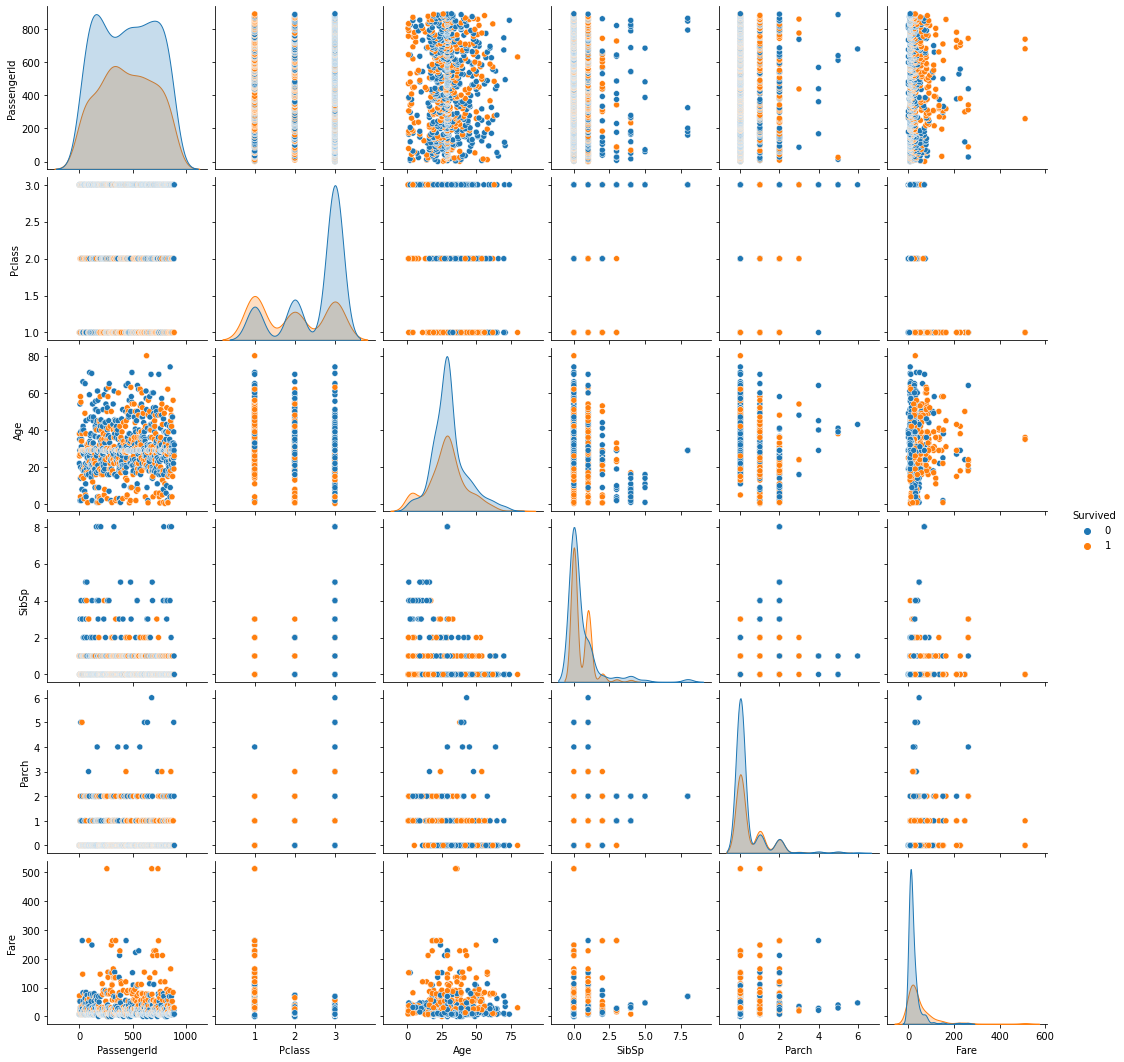

In [31]:
# pair Plot 

sns.pairplot(data=train,hue='Survived')
plt.show()

In [32]:
# Drop PassengerId Name ticket and cabin columns 
train.drop(['PassengerId','Name','Ticket','Cabin'], axis=1, inplace=True )

**Analyzing relationships betwwen variables**

**Correlation analisis**

Correlation analysis is used to quantify the degree to which two variables are related. Through the correlation analysis. You evaluate the correlation coefficient that tells you how much one variable changes when the other one does. Correlation analysis provides you with a linear relationship between two variables. When we correlation feature variables with the target variable, we get to know that how much dependency is there between particular feature variables and the target variables.

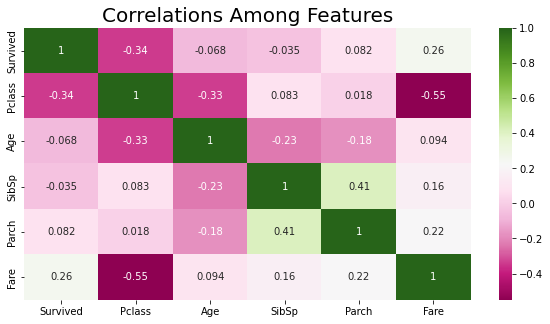

In [33]:
# sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
# plt.figure(figsize=(20,20))
# plt.show()

corrmat=train.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,5))
sns.heatmap(train[top_corr_features].corr(),annot=True,cmap='PiYG')
plt.title("Correlations Among Features", fontsize = 20)
plt.show()

**Feature Skilling**

In [34]:
from sklearn.preprocessing import StandardScaler
sts =StandardScaler()

In [35]:
feature_scale = ['Age','Fare']
train[feature_scale] = sts.fit_transform(train[feature_scale])

**Split the data frame into X & y**

In [36]:
# Sex and Embarked LabelEncoding string to float
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
train['Sex']=le.fit_transform(train['Sex'])
train['Embarked']=le.fit_transform(train['Embarked'])

In [37]:
target_name = 'Survived'

#Separate objectn for target feature
y = train[target_name]

#Separate Object for input featues
X = train.drop(target_name,axis=1)

In [38]:
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,-0.581659,1,0,-0.502445,3
1,1,0,0.649327,1,0,0.786845,0
2,3,0,-0.273913,0,0,-0.488854,3
3,1,0,0.418517,1,0,0.420730,3
4,3,1,0.418517,0,0,-0.486337,3


In [39]:
# Target Value Chack
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [40]:
# X values and y values shape Chack
X.shape, y.shape

((891, 7), (891,))

**Train Test Split**

In [41]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,-0.581659,1,0,-0.502445,3
1,1,1,0,0.649327,1,0,0.786845,0
2,1,3,0,-0.273913,0,0,-0.488854,3
3,1,1,0,0.418517,1,0,0.420730,3
4,0,3,1,0.418517,0,0,-0.486337,3
...,...,...,...,...,...,...,...,...
886,0,2,1,-0.196976,0,0,-0.386671,3
887,1,1,0,-0.812469,0,0,-0.044381,3
888,0,3,0,-0.043103,1,2,-0.176263,3
889,1,1,1,-0.273913,0,0,-0.044381,0


In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [43]:
# Train Data shape
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((712, 7), (179, 7), (712,), (179,))

In [44]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
348,3,1,-2.043455,1,1,-0.328280,3
408,3,1,-0.658596,0,0,-0.491874,3
645,1,1,1.418693,1,0,0.896497,0
326,3,1,2.418869,0,0,-0.522832,3
534,3,0,0.033834,0,0,-0.474005,3
...,...,...,...,...,...,...,...
711,1,1,-0.043103,0,0,-0.113846,3
305,1,1,-2.203483,1,2,2.402990,3
141,3,0,-0.581659,0,0,-0.492378,3
133,2,0,-0.043103,1,0,-0.124920,3


In [45]:
y_train

348    1
408    0
645    1
326    0
534    0
      ..
711    0
305    1
141    1
133    1
521    0
Name: Survived, Length: 712, dtype: int64

**Built the CLASSIFICATION Algorithms**

# **KNeighborsClassifier(KNN)**

In [46]:
# import sklearn KNeighborsClassifier(KNN) and grid search cv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [47]:
knn = KNeighborsClassifier()
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=15, scoring='accuracy', return_train_score=False,verbose=1)

# fitting the model for grid search
grid_search=grid.fit(X_train, y_train)

Fitting 15 folds for each of 30 candidates, totalling 450 fits


In [48]:
print("best_estimator result :-",grid_search.best_estimator_)
print("best_params result :-",grid_search.best_params_)

best_estimator result :- KNeighborsClassifier(n_neighbors=27)
best_params result :- {'n_neighbors': 27}


In [49]:
knn = KNeighborsClassifier(n_neighbors=26)
knn.fit(X_train,y_train)


y_pred_train = knn.predict(X_train)
accuracy_1 = accuracy_score(y_train,y_pred_train)
print('Accuracy for train data :',accuracy_1)

y_pred_test = knn.predict(X_test)
accuracy_1 = accuracy_score(y_test,y_pred_test)
print('Accuracy for test data :',accuracy_1)

Accuracy for train data : 0.8117977528089888
Accuracy for test data : 0.8324022346368715


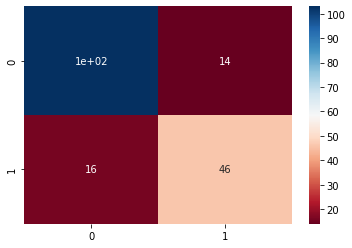

In [50]:
c_matrix_1 = confusion_matrix(y_test,y_pred_test)
c_matrix_1

#Utilizing the heatmap function we have presented the confusion matrix.
sns.heatmap(c_matrix_1 , cmap='RdBu',annot=True)
plt.show()

In [51]:
target_names = ['Survived','Not Survived']
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

    Survived       0.87      0.88      0.87       117
Not Survived       0.77      0.74      0.75        62

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



# **Navie-Bayes Algorithm**

In [52]:
# import sklearn naive_bayes 
from sklearn.naive_bayes import GaussianNB

In [53]:
gnb = GaussianNB(var_smoothing=0.01)
y_pred = gnb.fit(X_train,y_train).predict(X_test)

y_pred_train = gnb.predict(X_train)
accuracy_2 = accuracy_score(y_train,y_pred_train)
print('Accuracy for train data Result :',accuracy_2)

y_pred_test = gnb.predict(X_test)
accuracy_2 = accuracy_score(y_test,y_pred_test)
print('Accuracy for test data Result :',accuracy_2)

Accuracy for train data Result : 0.7963483146067416
Accuracy for test data Result : 0.7932960893854749


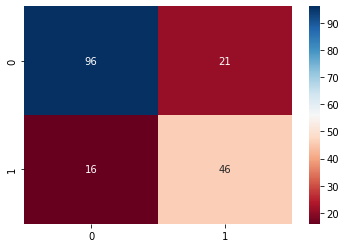

In [54]:
c_matrix_1 = confusion_matrix(y_test,y_pred_test)
c_matrix_1

#Utilizing the heatmap function we have presented the confusion matrix.
sns.heatmap(c_matrix_1 , cmap='RdBu',annot=True)
plt.show()

In [55]:
target_names = ['Survived','Not Survived']
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

    Survived       0.86      0.82      0.84       117
Not Survived       0.69      0.74      0.71        62

    accuracy                           0.79       179
   macro avg       0.77      0.78      0.78       179
weighted avg       0.80      0.79      0.80       179



# **Logistic-Regression Algroithm using grid search cv**

In [56]:
# import Logistic-Regrassion and grid search cv
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [57]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}   # l1 lasso l2 ridge
logreg = LogisticRegression()

# defining parameter range
logreg_cv = GridSearchCV(logreg,grid,cv=10)

# fitting the model for grid search
grid_search_log=logreg_cv.fit(X_train, y_train)

In [58]:
print("best_estimator result :-",grid_search_log.best_estimator_)
print("best_params result :-",grid_search_log.best_params_)

best_estimator result :- LogisticRegression(C=0.1)
best_params result :- {'C': 0.1, 'penalty': 'l2'}


In [59]:
logistic = LogisticRegression(C=0.1,penalty="l2")
y_pred = logistic.fit(X_train,y_train)


y_pred_train = logistic.predict(X_train)
accuracy_3 = accuracy_score(y_train,y_pred_train)
print('Accuracy for train data Result :',accuracy_3)

y_pred_test = logistic.predict(X_test)
accuracy_3 = accuracy_score(y_test,y_pred_test)
print('Accuracy for test data Result :',accuracy_3)

Accuracy for train data Result : 0.7991573033707865
Accuracy for test data Result : 0.8268156424581006


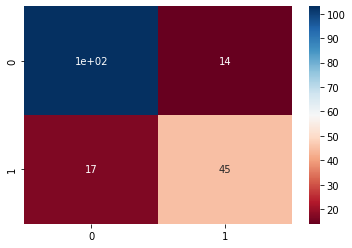

In [60]:

c_matrix_1 = confusion_matrix(y_test,y_pred_test)
c_matrix_1

#Utilizing the heatmap function we have presented the confusion matrix.
sns.heatmap(c_matrix_1 , cmap='RdBu',annot=True)
plt.show()

In [61]:
target_names = ['Survived','Not Survived']
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

    Survived       0.86      0.88      0.87       117
Not Survived       0.76      0.73      0.74        62

    accuracy                           0.83       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.83      0.83      0.83       179



# **Decision Tree Algrithm using grid search cv**

In [62]:
# import sklearn Decision Tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import GridSearchCV

In [63]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [64]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='auto', random_state=1024)

In [65]:
dici_class = DecisionTreeClassifier(max_depth=9,random_state=1024,max_features='log2',ccp_alpha=0.001)
y_pred = dici_class.fit(X_train,y_train)

y_pred_train = dici_class.predict(X_train)
accuracy = accuracy_score(y_train,y_pred_train)
print('Accuracy for train data Result :',accuracy)

y_pred_test = dici_class.predict(X_test)
accuracy_4 = accuracy_score(y_test,y_pred_test)
print('Accuracy for test data Result :',accuracy_4)

Accuracy for train data Result : 0.8904494382022472
Accuracy for test data Result : 0.8100558659217877


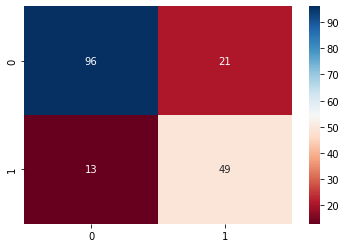

In [66]:
c_matrix_1 = confusion_matrix(y_test,y_pred_test)
c_matrix_1

#Utilizing the heatmap function we have presented the confusion matrix.
sns.heatmap(c_matrix_1 , cmap='RdBu',annot=True)
plt.show()

In [67]:
target_names = ['Survived','Not Survived']
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

    Survived       0.88      0.82      0.85       117
Not Survived       0.70      0.79      0.74        62

    accuracy                           0.81       179
   macro avg       0.79      0.81      0.80       179
weighted avg       0.82      0.81      0.81       179



# **Random Forest Machine Learning Algorithm**

In [68]:
from sklearn.ensemble import RandomForestClassifier

In [69]:
random = RandomForestClassifier(n_estimators= 8)
y_pred = random.fit(X_train, y_train).predict(X_test)

y_pred_train = random.predict(X_train)
accuracy = accuracy_score(y_train,y_pred_train)
print('Accuracy for train data :',accuracy)

y_pred_test = random.predict(X_test)
accuracy_5 = accuracy_score(y_test,y_pred_test)
print('Accuracy for test data :',accuracy_5)

Accuracy for train data : 0.9508426966292135
Accuracy for test data : 0.8603351955307262


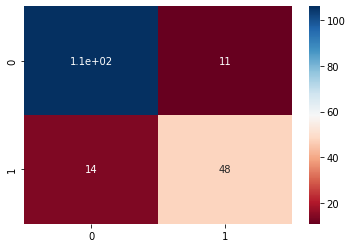

In [70]:
c_matrix_1 = confusion_matrix(y_test,y_pred_test)
c_matrix_1
#Utilizing the heatmap function we have presented the confusion matrix.
sns.heatmap(c_matrix_1 , cmap='RdBu',annot=True)
plt.show()

In [71]:
target_names = ['Survived','Not Survived']
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

    Survived       0.88      0.91      0.89       117
Not Survived       0.81      0.77      0.79        62

    accuracy                           0.86       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.86      0.86      0.86       179



# **Support vector machine Algorithm (SVM)**

In [72]:
# import svm algorithm
from sklearn import svm

In [73]:
clf = svm.SVC(degree=1)

y_pred = clf.fit(X_train,y_train).predict(X_test)

In [74]:
y_pred_train = clf.predict(X_train)
accuracy = accuracy_score(y_train,y_pred_train)
print('Accuracy for train data : ',accuracy)

y_pred_test = clf.predict(X_test)
accuracy_6 = accuracy_score(y_test,y_pred_test)
print('Accuracy for test data : ',accuracy_6)

Accuracy for train data :  0.8188202247191011
Accuracy for test data :  0.8603351955307262


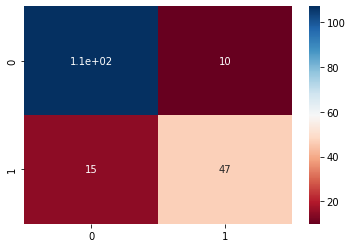

In [75]:
c_matrix_1 = confusion_matrix(y_test,y_pred_test)
c_matrix_1
#Utilizing the heatmap function we have presented the confusion matrix.
sns.heatmap(c_matrix_1 , cmap='RdBu',annot=True)
plt.show()

In [76]:
target_names = ['Survived','Not Survived']
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

    Survived       0.88      0.91      0.90       117
Not Survived       0.82      0.76      0.79        62

    accuracy                           0.86       179
   macro avg       0.85      0.84      0.84       179
weighted avg       0.86      0.86      0.86       179



# **Gradient Boosting Algorithm**

In [77]:
# import gradient boosting algorithm
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier

In [78]:
gradi = GradientBoostingClassifier(n_estimators=5, learning_rate=3.0,
    max_depth=5, random_state=0)

y_pred = gradi.fit(X_train,y_train)

In [79]:
y_pred_train = gradi.predict(X_train)
accuracy = accuracy_score(y_train,y_pred_train)
print('Accuracy for train data : ',accuracy)

y_pred_test = gradi.predict(X_test)
accuracy_7 = accuracy_score(y_test,y_pred_test)
print('Accuracy for test data : ',accuracy_7)

Accuracy for train data :  0.46769662921348315
Accuracy for test data :  0.4860335195530726


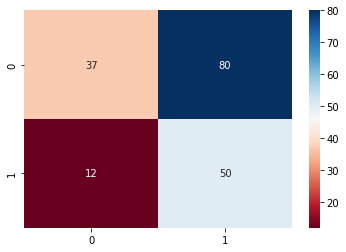

In [80]:
c_matrix_1 = confusion_matrix(y_test, y_pred_test)

#Utilizing the heatmap function we have presented the confusion matrix.
sns.heatmap(c_matrix_1 , cmap='RdBu',annot=True)
plt.show()

In [81]:
target_names = ['Survived','Not Survived']
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

    Survived       0.76      0.32      0.45       117
Not Survived       0.38      0.81      0.52        62

    accuracy                           0.49       179
   macro avg       0.57      0.56      0.48       179
weighted avg       0.63      0.49      0.47       179



# **Comparison**

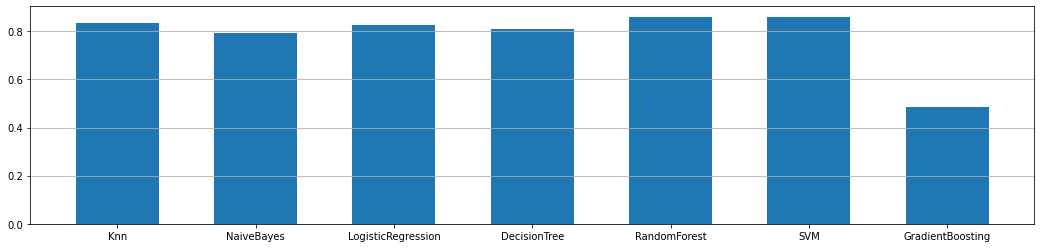

In [82]:
#Lastly we have represented the optimal accuracy by comparing of all the algorithms applying the bar diagram

x = np.array(["Knn", "NaiveBayes", "LogisticRegression", "DecisionTree","RandomForest","SVM","GradientBoosting"])
y = np.array([accuracy_1, accuracy_2, accuracy_3,accuracy_4,accuracy_5,accuracy_6,accuracy_7])
plt.figure(figsize=(18,4))
plt.bar(x,y,width = 0.6)
plt.grid(axis = 'y')
plt.show()

From above all the results, we can see that the **RandomForest Algorithm** has achieved **86.03%** accuracy, which is higher than the rest of the algorithms. Therefore, we can say that the RandomForest algorithm has better performance than others in the prediction of diabetics.

In [84]:
# ...............................

In [85]:
model_Rant = RandomForestClassifier(n_estimators= 8)

In [86]:
model_Rant.fit(X_test,y_test)

RandomForestClassifier(n_estimators=8)

In [87]:
# import test data 
test = pd.read_csv("/content/drive/MyDrive/Kaggle Competitions/Titanic-ML from Disaster /test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [88]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [89]:
df3=test.drop(['PassengerId','Name','Ticket','Cabin'], axis=1) 

In [90]:
df3.isnull().sum()

Pclass       0
Sex          0
Age         86
SibSp        0
Parch        0
Fare         1
Embarked     0
dtype: int64

In [91]:
df3['Age'].fillna(df3['Age'].mean(),inplace=True)
df3['Fare'].fillna(df3['Fare'].mean(),inplace=True)

In [92]:
l_sex_dummies=pd.get_dummies(df3['Sex'],drop_first=True)
df3= pd.concat([df3,l_sex_dummies],axis=1)
df3.drop(['Sex'], axis=1, inplace=True )

In [93]:
df3['Embarked']=le.fit_transform(df3['Embarked'])

In [94]:
df3.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,3,34.5,0,0,7.8292,1,1
1,3,47.0,1,0,7.0000,2,0
2,2,62.0,0,0,9.6875,1,1
3,3,27.0,0,0,8.6625,2,1
4,3,22.0,1,1,12.2875,2,0


In [95]:
df3[feature_scale] = sts.fit_transform(df3[feature_scale])

In [96]:
df3.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked,male
0,3,0.334993,0,0,-0.498407,1,1
1,3,1.325530,1,0,-0.513274,2,0
2,2,2.514175,0,0,-0.465088,1,1
3,3,-0.259330,0,0,-0.483466,2,1
4,3,-0.655545,1,1,-0.418471,2,0


In [97]:
y_predicted = model_Rant.predict(df3)

In [98]:
submission = pd.DataFrame({
        "PassengerId": test['PassengerId'],
        "Survived": y_predicted
    })

In [99]:
submission.to_csv('titanic_submission_1.csv', index=False)

In [100]:
! ls

drive  sample_data  titanic_submission_1.csv


In [101]:
! cat titanic_submission_2.csv

cat: titanic_submission_2.csv: No such file or directory
